In [3]:
import Ramsey_ExperimentV2
import numpy as np

In [8]:
import estimator
from tqdm import tqdm
import random

shots = np.arange(500, 50000, 5000)
errors_global = []
errors_local = []
errors_rot = []
n = 4
delay = [0.3]


repetitions = 50
for rep in range(repetitions):
    rep_error_global = []
    rep_error_local = []
    rep_error_rot = []
    W = [random.gauss(0, 3) for _ in range(n)]
    Decay = [random.gauss(3, 1) for _ in range(n)]
    J = [random.gauss(0, 3) for _ in range(n - 1)]
    for s in tqdm(shots, desc=f"Repetition {rep}"):
        batch_x, batch_y = Ramsey_ExperimentV2.ramsey_global(n, s, delay, Decay, W, J)
        batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV2.ramsey_local(n, s, delay, Decay,
                                                                                                  W, J)
        batch_x_rot1, batch_y_rot1 = Ramsey_ExperimentV2.ramsey_global_with_rot(n,int(s/2),delay,Decay,W,J, 0.15*np.pi)
        batch_x_rot2, batch_y_rot2 = Ramsey_ExperimentV2.ramsey_global_with_rot(n,int(s/2),delay,Decay,W,J,0.85*np.pi)



        Decay_local, W_local, J_local = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross,
                                                                           batch_y_cross)
        Decay_global, W_global, J_global = estimator.full_complex_fit(batch_x, batch_y, neighbors=1)

        Decay_rot, W_rot, J_rot = estimator.full_complex_fit_test(batch_x_rot1, batch_y_rot1, batch_x_rot2, batch_y_rot2)



        rep_error_global.append(estimator.percent_error(np.concatenate([Decay, W, J]),
                                                                  np.concatenate([Decay_global, W_global, J_global])))
        rep_error_local.append(estimator.percent_error(np.concatenate([Decay, W, J]),
                                                                 np.concatenate([Decay_local, W_local, J_local])))
        rep_error_rot.append(estimator.percent_error(np.concatenate([Decay, W, J]),
                                                                 np.concatenate([Decay_rot, W_rot, J_rot])))



    errors_global.append(rep_error_global)
    errors_local.append(rep_error_local)
    errors_rot.append(rep_error_rot)


Repetition 49: 100%|██████████| 10/10 [05:04<00:00, 30.45s/it]


In [18]:
errors_global_reshaped = list(map(list, zip(*errors_global)))
errors_global_median = [np.median(np.array(errors_global_reshaped[i])) for i in range(len(errors_global_reshaped))]
errors_global_std = [np.std(np.array(errors_global_reshaped[i])) for i in range(len(errors_global_reshaped))]

errors_local_reshaped = list(map(list, zip(*errors_local)))
errors_local_median = [np.median(np.array(errors_local_reshaped[i])) for i in range(len(errors_local_reshaped))]
errors_local_std = [np.std(np.array(errors_local_reshaped[i])) for i in range(len(errors_local_reshaped))]

errors_rot_reshaped = list(map(list, zip(*errors_rot)))
errors_rot_median = [np.median(np.array(errors_rot_reshaped[i])) for i in range(len(errors_rot_reshaped))]
errors_rot_std = [np.std(np.array(errors_rot_reshaped[i])) for i in range(len(errors_rot_reshaped))]

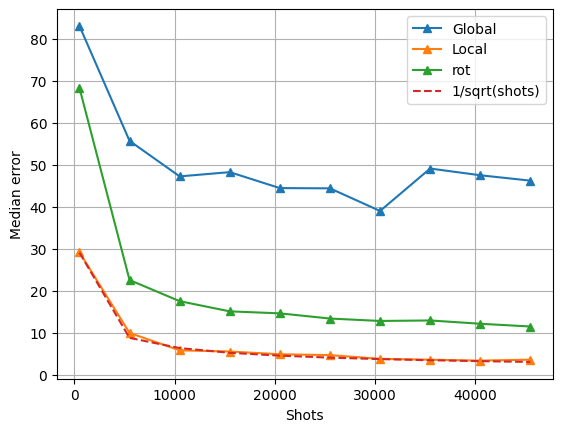

In [20]:
import matplotlib.pyplot as plt

plt.plot(shots, errors_global_median, '-^', label='Global')
plt.plot(shots, errors_local_median, '-^', label='Local')
plt.plot(shots, errors_rot_median, '-^', label='rot')
plt.plot(shots, np.e * 2.394 /np.sqrt(shots) * 100, '--', label='1/sqrt(shots)')
plt.xlabel('Shots')
plt.ylabel('Median error')
# plt.loglog()
plt.grid()
plt.legend()

In [14]:
import pandas as pd

import pandas as pd

# Assuming errors_global_reshaped, errors_local_reshaped, errors_rot_reshaped,
# errors_global_median, errors_local_median, and errors_rot_median are already defined

# Convert reshaped lists into DataFrames
df_errors_global_reshaped = pd.DataFrame(errors_global_reshaped)
df_errors_local_reshaped = pd.DataFrame(errors_local_reshaped)
df_errors_rot_reshaped = pd.DataFrame(errors_rot_reshaped)

# Convert median lists into a DataFrame
data_medians = {
    'errors_global_median': errors_global_median,
    'errors_local_median': errors_local_median,
    'errors_rot_median': errors_rot_median
}
df_medians = pd.DataFrame(data_medians)

# Save each DataFrame to a CSV file
df_errors_global_reshaped.to_csv('results/rotation/errors_global_reshaped.csv', index=False)
df_errors_local_reshaped.to_csv('results/rotation/errors_local_reshaped.csv', index=False)
df_errors_rot_reshaped.to_csv('results/rotation/errors_rot_reshaped.csv', index=False)
df_medians.to_csv('results/rotation/errors_medians.csv', index=False)


In [6]:
import pandas as pd
# Load each CSV file back into a DataFrame
df_errors_global_reshaped_loaded = pd.read_csv('results/rotation/errors_global_reshaped.csv')
df_errors_local_reshaped_loaded = pd.read_csv('results/rotation/errors_local_reshaped.csv')
df_errors_rot_reshaped_loaded = pd.read_csv('results/rotation/errors_rot_reshaped.csv')
df_medians_loaded = pd.read_csv('results/rotation/errors_medians.csv')

# Convert DataFrames back to lists of lists
errors_global_reshaped = df_errors_global_reshaped_loaded.values.tolist()
errors_local_reshaped = df_errors_local_reshaped_loaded.values.tolist()
errors_rot_reshaped = df_errors_rot_reshaped_loaded.values.tolist()

# Convert median columns back to lists
errors_global_median = df_medians_loaded['errors_global_median'].tolist()
errors_local_median = df_medians_loaded['errors_local_median'].tolist()
errors_rot_median = df_medians_loaded['errors_rot_median'].tolist()
